In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.28

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [3]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display,Image

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
ROOT_PATH='/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8'
!pwd

/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8


In [14]:
%cd '/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8'

/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8


In [15]:
!ls

data.yaml  roofs


In [20]:
!yolo task=segment mode=train model=yolov8s-seg.pt data={ROOT_PATH}/data.yaml epochs=100 imgsz=640 save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, 

In [21]:
!ls runs/segment/train5

args.yaml					    MaskP_curve.png   train_batch90.jpg
BoxF1_curve.png					    MaskPR_curve.png  train_batch91.jpg
BoxP_curve.png					    MaskR_curve.png   train_batch92.jpg
BoxPR_curve.png					    results.csv       val_batch0_labels.jpg
BoxR_curve.png					    results.png       val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg  weights
events.out.tfevents.1724492306.33e37a00881f.9310.0  train_batch1.jpg
MaskF1_curve.png				    train_batch2.jpg


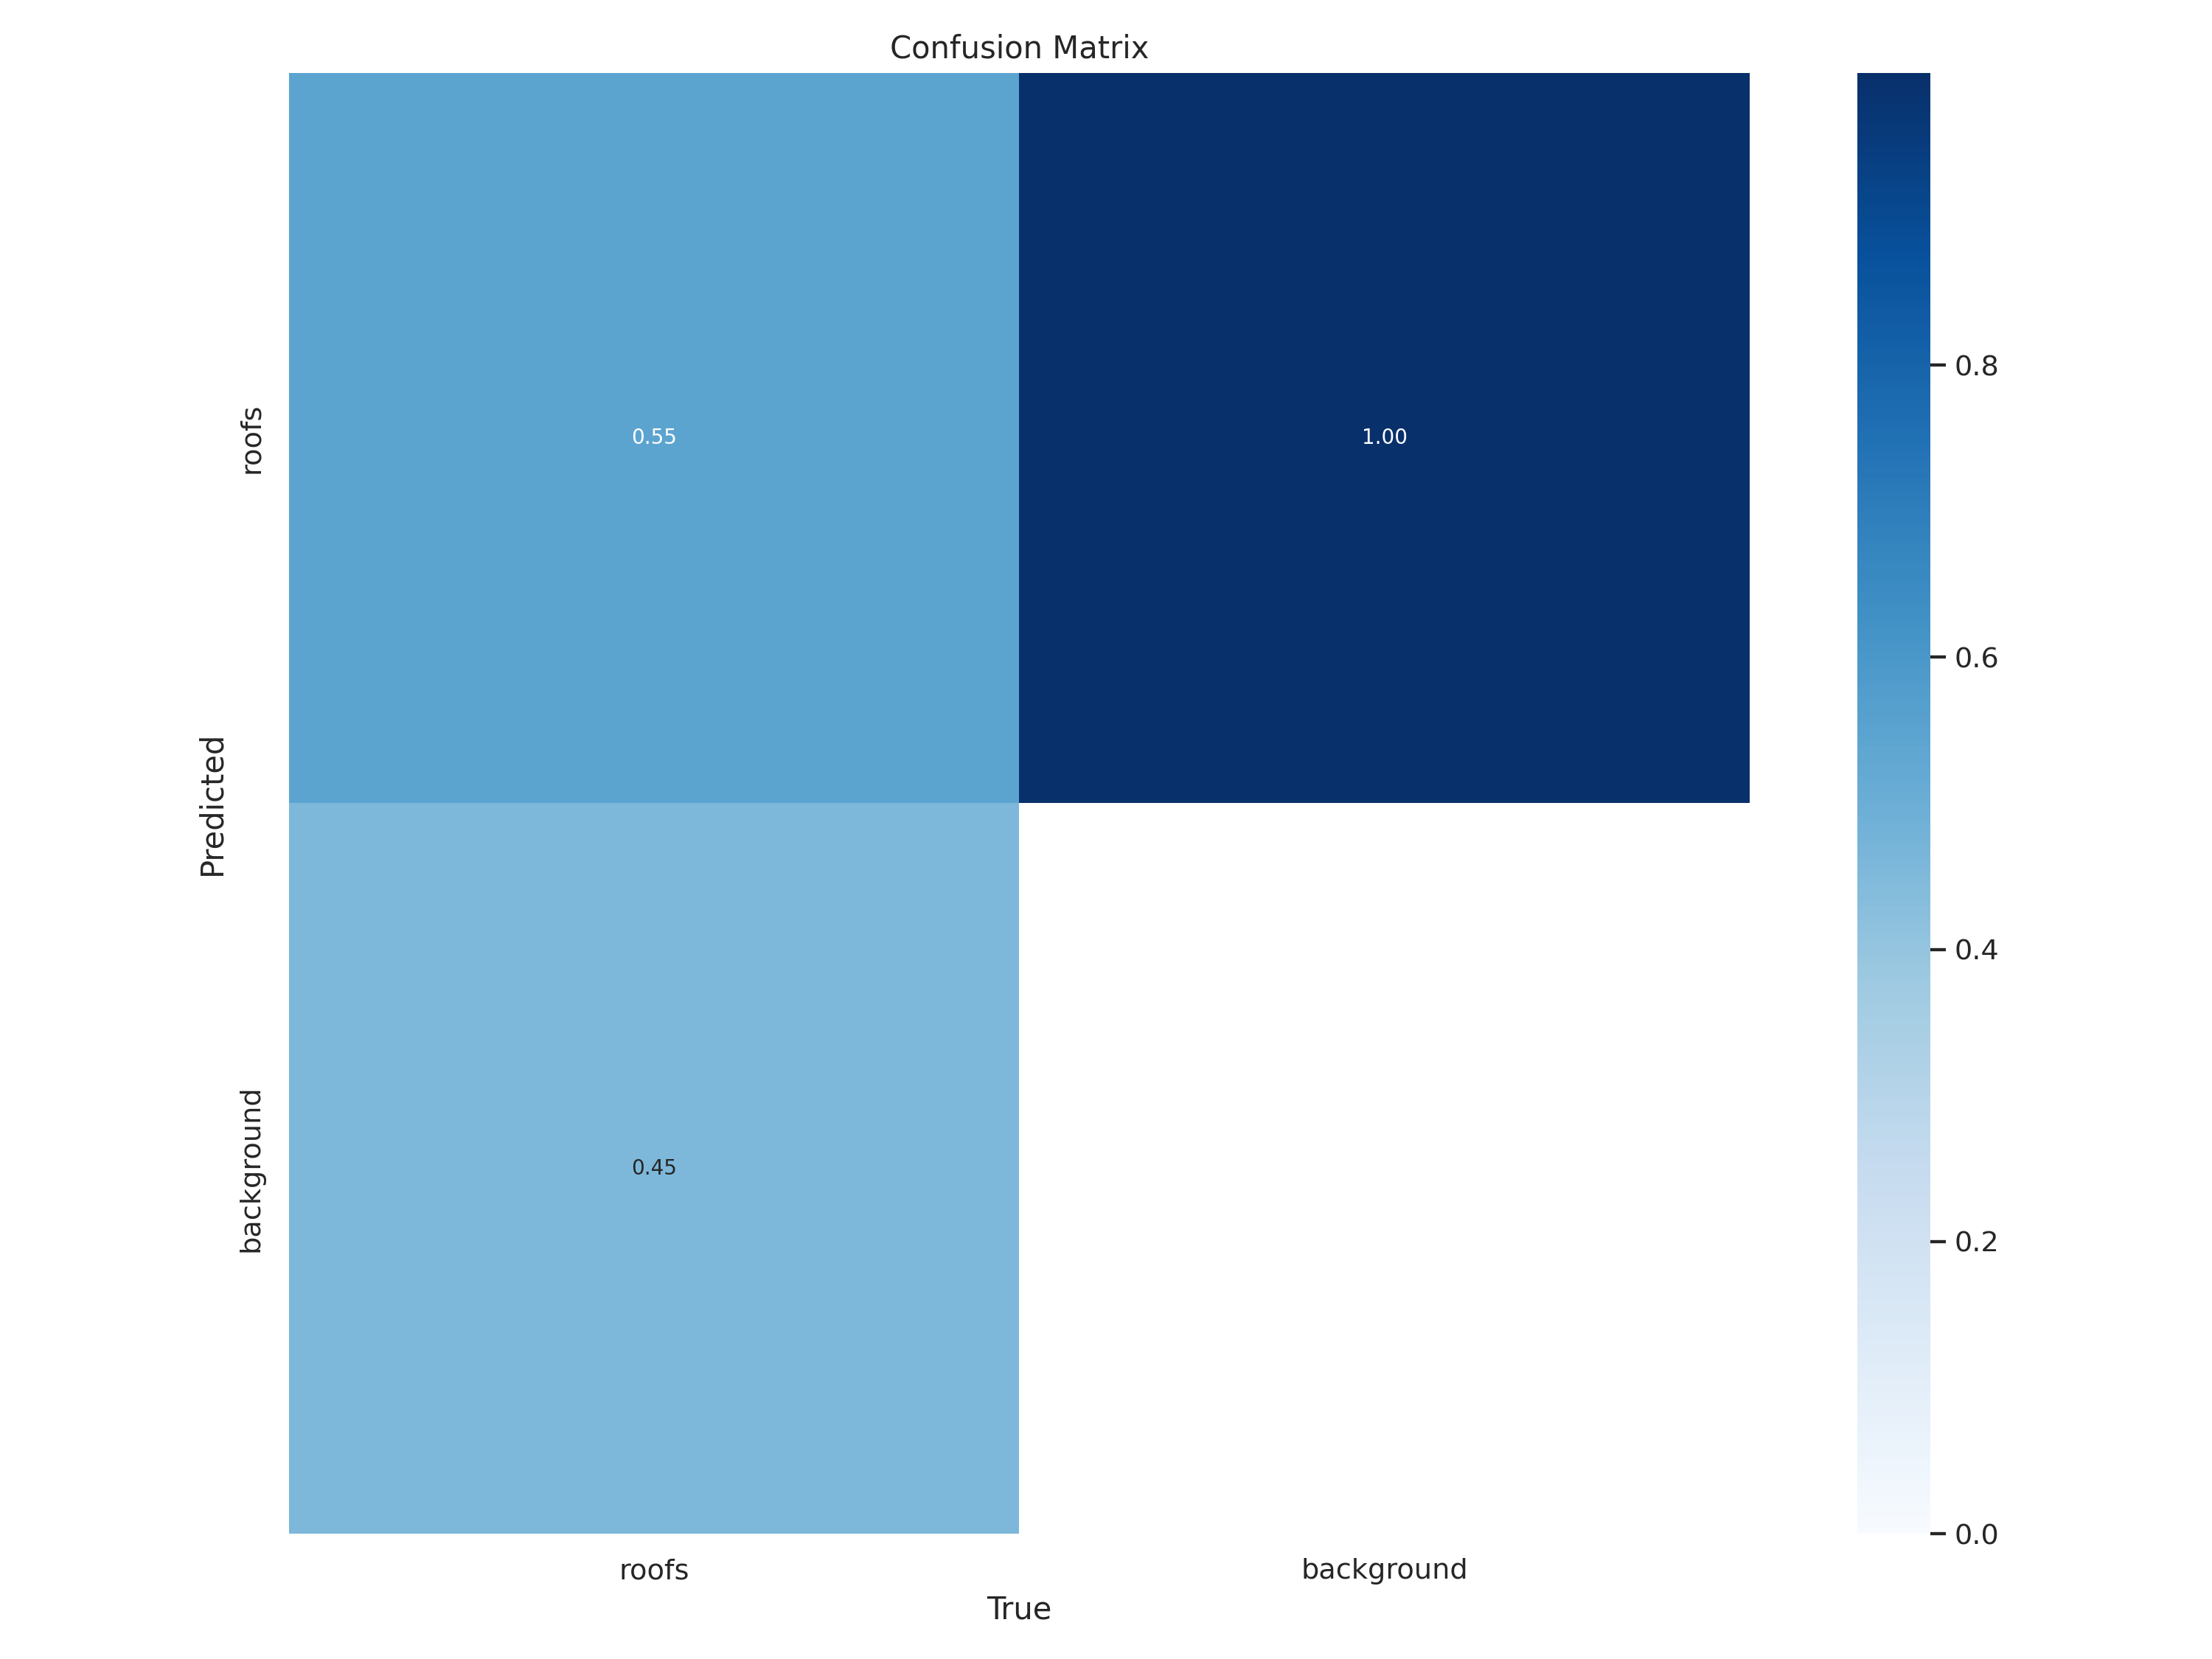

In [26]:
Image(filename='runs/segment/train5/confusion_matrix.png',width=600)

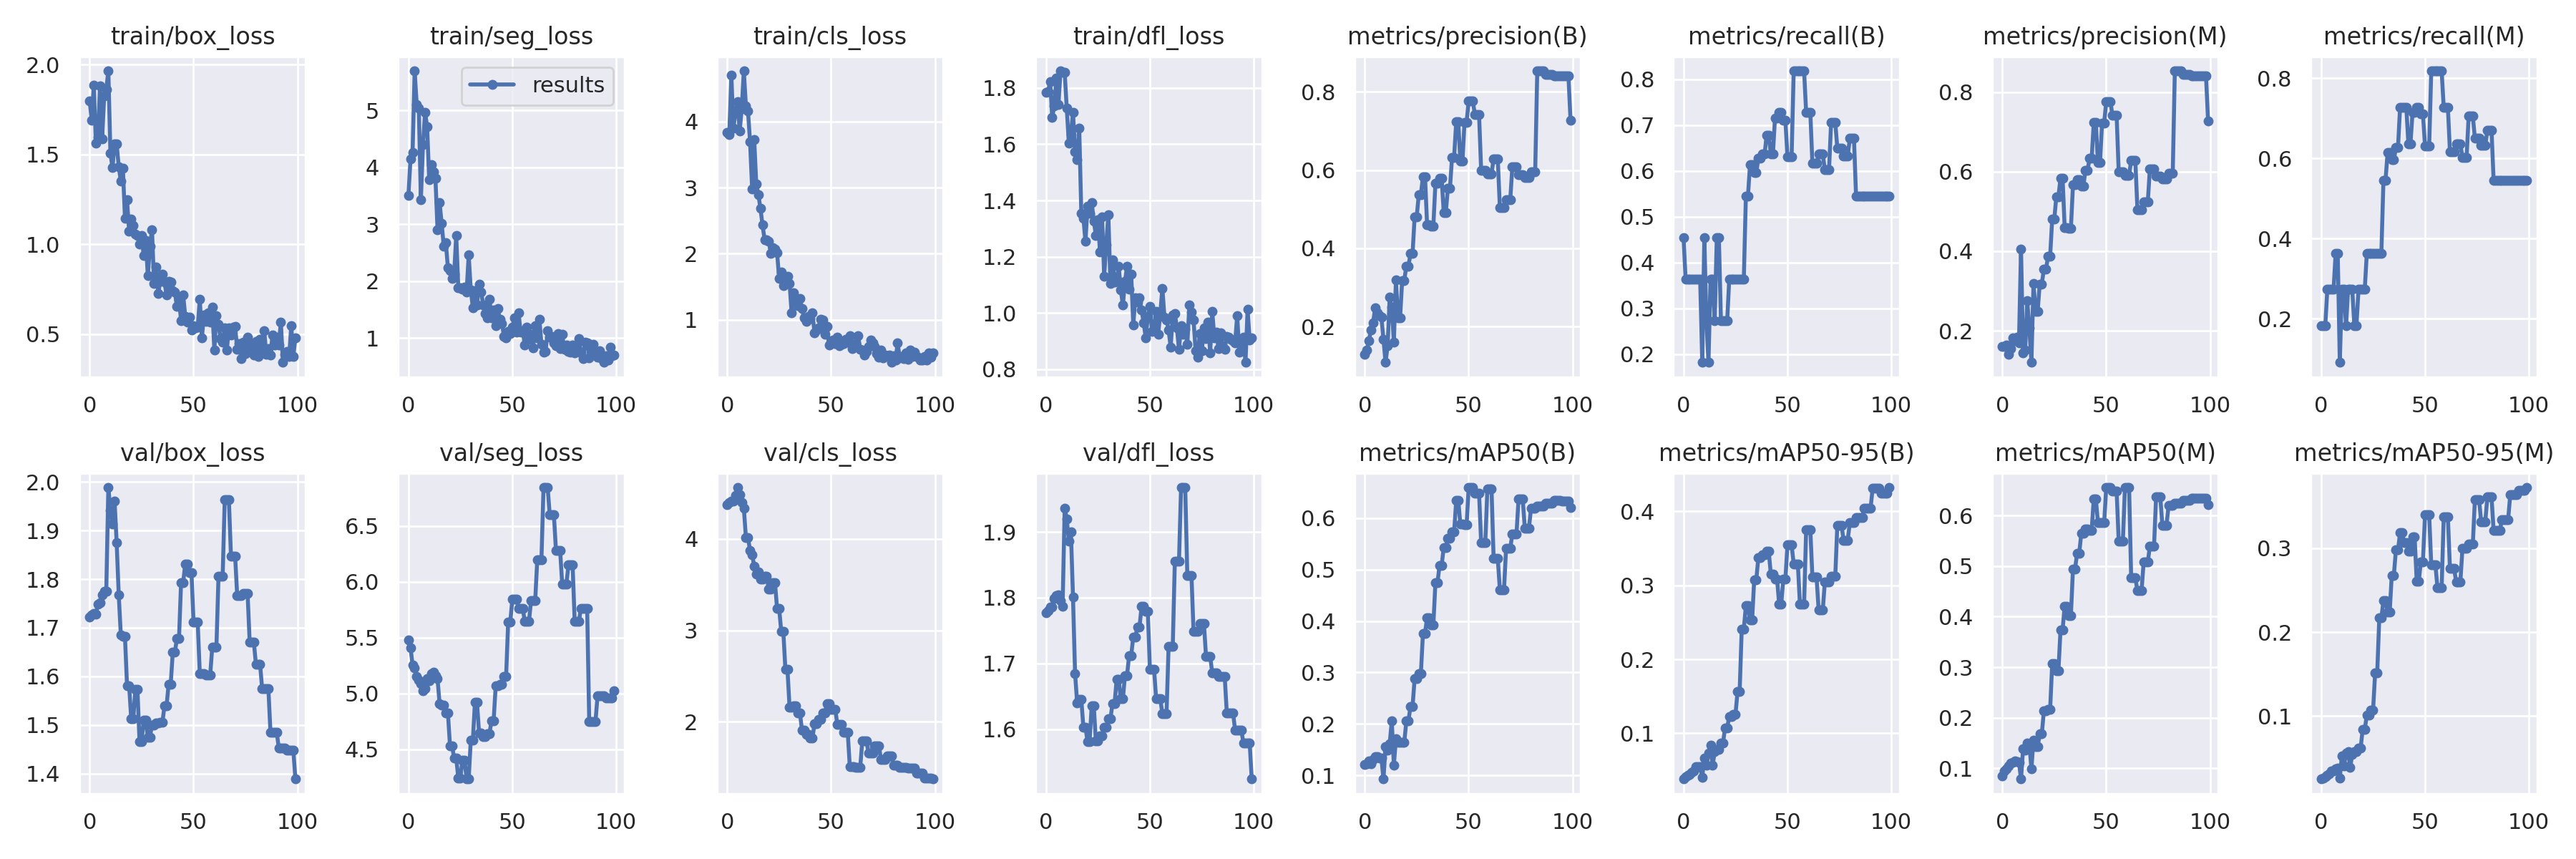

In [27]:
Image(filename='/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8/runs/segment/train5/results.png',width=600)

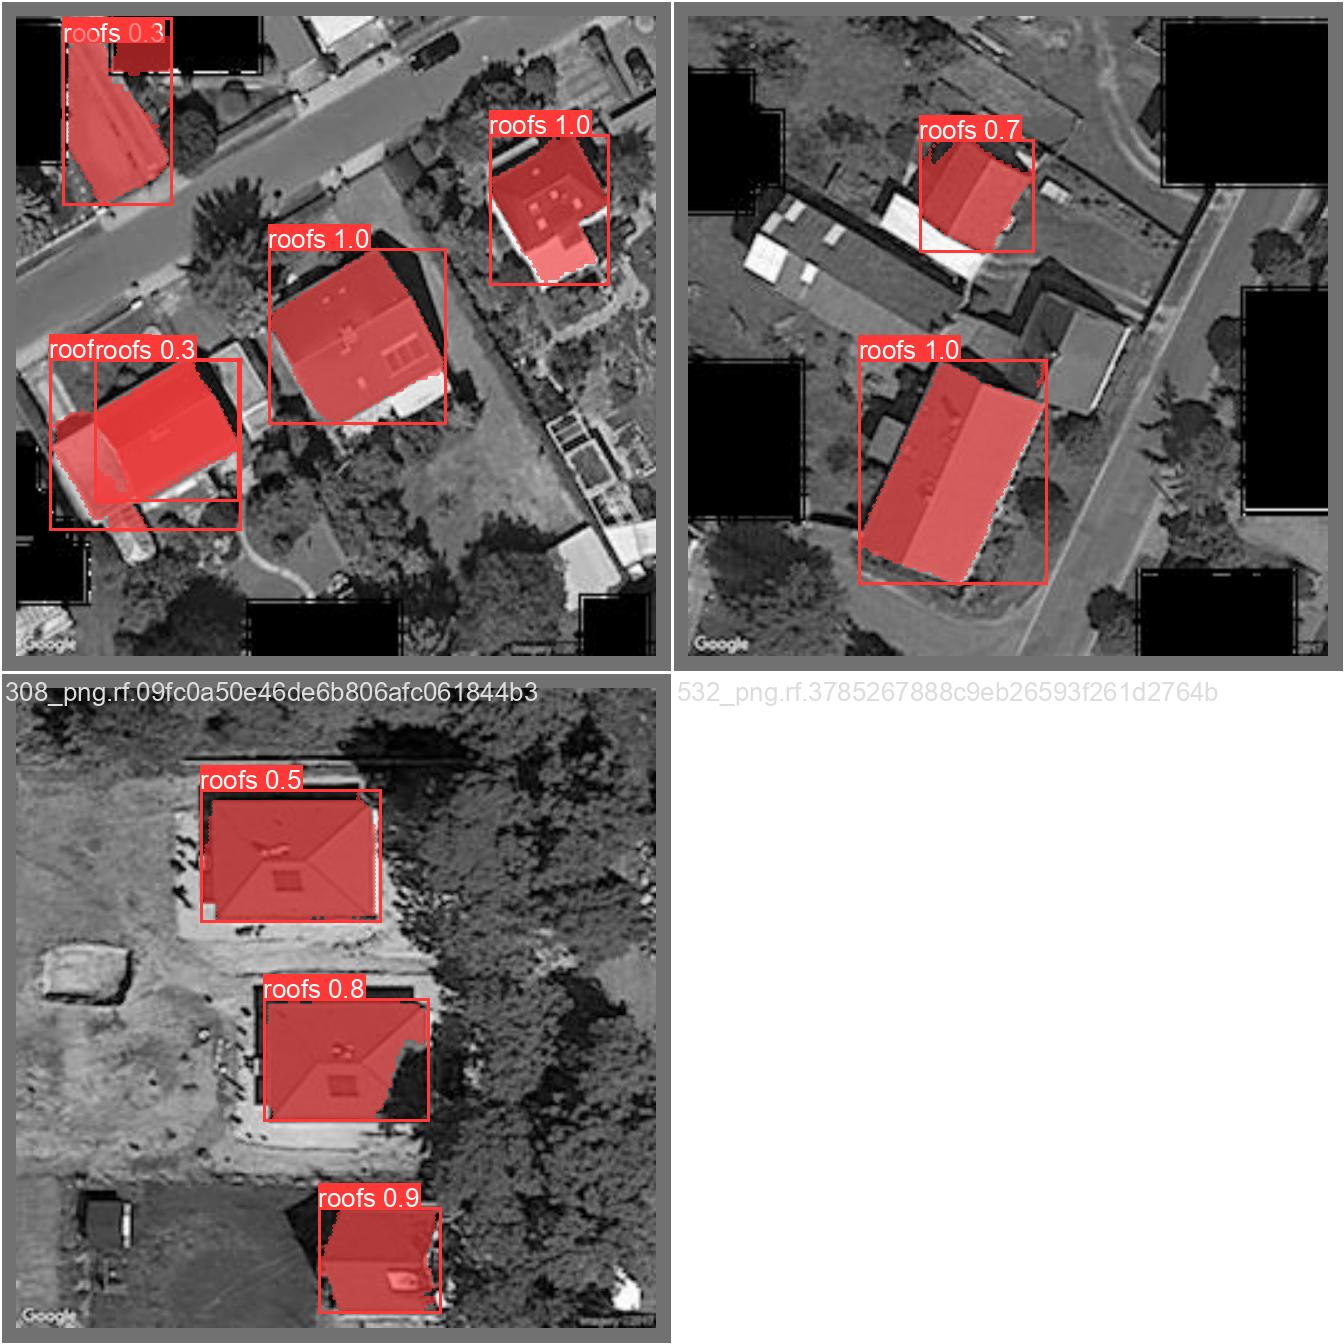

In [28]:
Image(filename='/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8/runs/segment/train5/val_batch0_pred.jpg',width=600)

Trying to validate

In [29]:
!yolo task=segment mode=val model=/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8/runs/segment/train5/weights/best.pt data={ROOT_PATH}/data.yaml

2024-08-24 09:55:27.581334: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 09:55:27.613650: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 09:55:27.624011: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 09:55:27.648890: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-24 09:55:29.532886: W tensorflow/comp

In [32]:
!yolo task=segment mode=predict model=/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8/runs/segment/train5/weights/best.pt conf=0.25 source=roofs/test/images save=true

2024-08-24 10:01:05.485549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 10:01:05.521066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 10:01:05.532204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 10:01:05.556086: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-24 10:01:07.196706: W tensorflow/comp

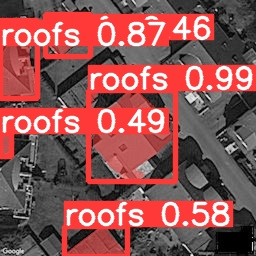

In [35]:
import glob
from IPython.display import Image,display
for i in glob.glob('/content/drive/MyDrive/DataSets/highqualityroofs.v4i.yolov8/runs/segment/predict/*.jpg')[:3]:
  display(Image(filename=i,width=600))
  print('\n')